<a href="https://colab.research.google.com/github/brayanricardo13/Analitica-de-datos/blob/main/BENCKMARK_Renta_Fija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from openpyxl import workbook , load_workbook 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # Regresion multiple
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import statsmodels.api as sm
import statistics

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
Modelo = pd.read_excel("/content/drive/MyDrive/CORFICOLOMBIANA/Base Indices.xlsx", sheet_name="Indices",header=0, index_col="Fecha") 
Modelo = pd.DataFrame(Modelo)
Modelo.tail()

,COLTES UVR,COLTES CP UVR,COLTES LP UVR,COLTES,COLTES CP,COLTES LP
Fecha,,,,,,
2022-12-21,316.80,112.28,93.60,263.19,256.97,278.24
2022-12-22,317.92,112.51,94.00,263.58,257.46,278.59
2022-12-23,317.91,112.73,93.91,264.82,258.34,280.12
2022-12-26,318.14,112.92,93.94,263.84,258.20,278.55
2022-12-27,317.73,113.05,93.71,262.18,257.72,276.04


In [68]:
Modelo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2022-06-28 to 2022-12-27
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COLTES UVR     124 non-null    float64
 1   COLTES CP UVR  124 non-null    float64
 2   COLTES LP UVR  124 non-null    float64
 3   COLTES         124 non-null    float64
 4   COLTES CP      124 non-null    float64
 5   COLTES LP      124 non-null    float64
dtypes: float64(6)
memory usage: 6.8 KB


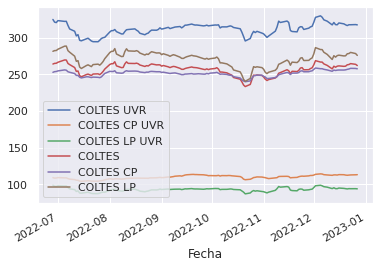

In [69]:
Modelo.plot()

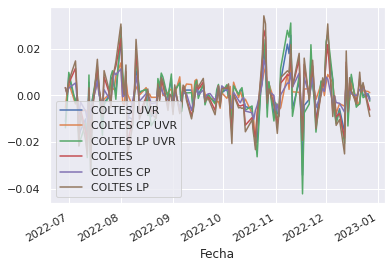

In [70]:
Retornos = Modelo.pct_change() 
Retornos.plot()

In [71]:
Modelo.describe()

,COLTES UVR,COLTES CP UVR,COLTES LP UVR,COLTES,COLTES CP,COLTES LP
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.00000
mean,312.381694,109.722823,92.708065,257.152419,251.560000,271.31871
std,7.710632,2.616329,2.580372,7.523217,3.911362,9.89684
min,294.700000,104.030000,86.860000,233.470000,240.050000,240.63000
25%,308.140000,108.127500,91.080000,252.077500,249.255000,264.74750
50%,313.640000,109.580000,93.010000,258.920000,251.915000,273.64000
75%,317.575000,111.950000,93.917500,263.067500,254.240000,278.34750
max,330.100000,114.170000,98.670000,269.790000,258.780000,288.76000


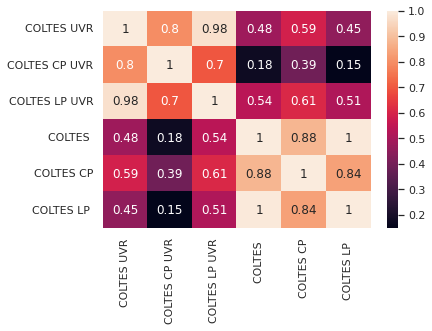

In [72]:
Modelo=Modelo.corr(method="spearman") 
sns.heatmap(Modelo,annot=True) # Diagrama de correlacion 